 # project: 고양이 수염 스티커 만들기

## library import

In [283]:
import cv2 # opencv
import matplotlib.pyplot as plt
import numpy as np

import dlib # face landmark localization

import os

## img data import

In [284]:
#img path
img_path= "./imgs/s3.jpg"
mushtache_path= "./imgs/05-cat_m.png"

#img read
img_origin_target = cv2.imread(img_path)
img_origin_mushtache = cv2.imread(mushtache_path)

img_show = img_origin_target.copy() # 출력용 이미지 복사

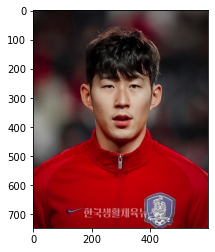

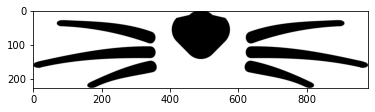

In [285]:
# 이미지 출력
img_rgb = cv2.cvtColor(img_origin_target, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

img_rgb = cv2.cvtColor(img_origin_mushtache, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


## 얼굴 찾기 face detection

In [286]:
# detector 선언
Detector_HOG = dlib.get_frontal_face_detector()


In [287]:
# bounding box 추출

img_rgb = cv2.cvtColor(img_origin_target, cv2.COLOR_BGR2RGB) # rgb 이미지 

face_rect = Detector_HOG(img_rgb, 1) # 이미지 파라미터

print(face_rect)

rectangles[[(191, 192) (414, 415)]]


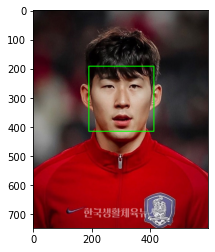

In [288]:
# 

for dlib_rect in face_rect:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 점 찍기 face landmark localization

In [289]:
# object kepoin estimation import
# model import

model_path = './data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


In [290]:
# point 생성.
points = landmark_predictor(img_rgb, face_rect[0])
print("points", points)


# 포인트 색출
list_point = []
list_points = list(map(lambda p: (p.x, p.y), points.parts())) # x,y 좌표 셋트로
list_point.append(list_points)

print("\n-포인트 좌표들-")
print(list_point)
print("\n")
print(len(list_point[0]))


points <_dlib_pybind11.full_object_detection object at 0x7f399926b5b0>

-포인트 좌표들-
[[(196, 268), (199, 296), (204, 324), (209, 351), (217, 378), (233, 404), (252, 426), (276, 443), (304, 447), (333, 443), (356, 427), (375, 406), (391, 383), (400, 356), (403, 328), (406, 299), (408, 272), (223, 239), (235, 223), (254, 216), (274, 217), (291, 225), (314, 225), (334, 220), (353, 219), (372, 225), (383, 241), (305, 257), (305, 276), (306, 296), (306, 316), (286, 333), (296, 336), (307, 339), (316, 335), (326, 332), (243, 263), (253, 258), (266, 258), (276, 266), (265, 268), (253, 268), (331, 265), (341, 258), (353, 258), (364, 264), (354, 268), (342, 268), (271, 375), (283, 365), (297, 357), (306, 361), (315, 358), (327, 365), (337, 375), (327, 391), (315, 399), (305, 400), (294, 398), (281, 390), (278, 375), (296, 372), (306, 373), (315, 372), (330, 375), (315, 378), (305, 380), (296, 379)]]


68


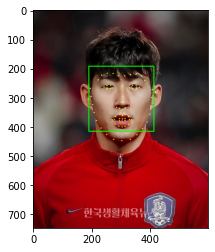

In [291]:
# 사진에 point 까지 찍기
#사진에 점찍기....


for idx, point in enumerate(list_points):
    cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용 위치 
- [hint] 2, 36, 48, 30 번 인덱스를 이용
![](./imgs/03-dll.png)

[(196, 268), (199, 296), (204, 324), (209, 351), (217, 378), (233, 404), (252, 426), (276, 443), (304, 447), (333, 443), (356, 427), (375, 406), (391, 383), (400, 356), (403, 328), (406, 299), (408, 272), (223, 239), (235, 223), (254, 216), (274, 217), (291, 225), (314, 225), (334, 220), (353, 219), (372, 225), (383, 241), (305, 257), (305, 276), (306, 296), (306, 316), (286, 333), (296, 336), (307, 339), (316, 335), (326, 332), (243, 263), (253, 258), (266, 258), (276, 266), (265, 268), (253, 268), (331, 265), (341, 258), (353, 258), (364, 264), (354, 268), (342, 268), (271, 375), (283, 365), (297, 357), (306, 361), (315, 358), (327, 365), (337, 375), (327, 391), (315, 399), (305, 400), (294, 398), (281, 390), (278, 375), (296, 372), (306, 373), (315, 372), (330, 375), (315, 378), (305, 380), (296, 379)]


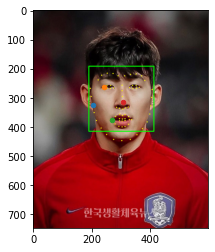

In [292]:

#y = int(np.mean((list_points[33][1],list_points[51][1])))
#plt.plot(list_points[2], list_points[36], list_points[48],list_points[30],  marker = 'o')
print(list_points)
#plt.plot(list_points[0], list_points[3])
plt.scatter(list_points[2][0],list_points[2][1], s=20)
plt.scatter(list_points[36][0],list_points[36][1], s=20)

plt.scatter(list_points[48][0],list_points[48][1], s=20)
plt.scatter(list_points[30][0],list_points[30][1], s=20)



plt.imshow(img_show_rgb)

[(196, 268), (199, 296), (204, 324), (209, 351), (217, 378), (233, 404), (252, 426), (276, 443), (304, 447), (333, 443), (356, 427), (375, 406), (391, 383), (400, 356), (403, 328), (406, 299), (408, 272), (223, 239), (235, 223), (254, 216), (274, 217), (291, 225), (314, 225), (334, 220), (353, 219), (372, 225), (383, 241), (305, 257), (305, 276), (306, 296), (306, 316), (286, 333), (296, 336), (307, 339), (316, 335), (326, 332), (243, 263), (253, 258), (266, 258), (276, 266), (265, 268), (253, 268), (331, 265), (341, 258), (353, 258), (364, 264), (354, 268), (342, 268), (271, 375), (283, 365), (297, 357), (306, 361), (315, 358), (327, 365), (337, 375), (327, 391), (315, 399), (305, 400), (294, 398), (281, 390), (278, 375), (296, 372), (306, 373), (315, 372), (330, 375), (315, 378), (305, 380), (296, 379)]


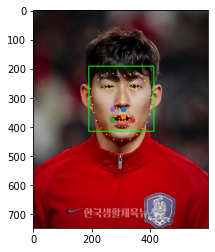

In [293]:
#y = int(np.mean((list_points[33][1],list_points[51][1])))
#plt.plot(list_points[2], list_points[36], list_points[48],list_points[30],  marker = 'o')
print(list_points)
#plt.plot(list_points[0], list_points[3])
plt.scatter(list_points[33][0],list_points[33][1], s=20)
plt.scatter(list_points[51][0],list_points[51][1], s=20)

plt.scatter(list_points[48][0],list_points[48][1], s=20)
plt.scatter(list_points[54][0],list_points[54][1], s=20)

plt.scatter(list_points[48][0],list_points[33][1], s=20)

plt.imshow(img_show_rgb)

In [294]:
# 

In [295]:
## 콧수염 리사이즈
# 입슬과 코사이 33, 51 유클리드 거리로  => hight 
# 입술 48, 54 width 유클리드 거리로=> width

# def euclidean_distance(pt1, pt2):
#   distance = 0
#   for i in range(len(pt1)):
#     distance += (pt1[i] - pt2[i]) ** 2
#   return distance ** 0.5

# h = int(euclidean_distance(list_points[33], list_points[51])) 
# w = int(euclidean_distance(list_points[48], list_points[54])) 
#####################################################################################
#  2, 30   36, 48,

In [296]:
  list_points[36][1],  

(263,)

204 46
원래크기:  (226, 981, 3)


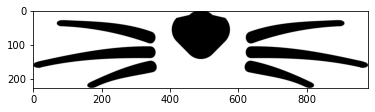

resize:  (46, 204, 3)


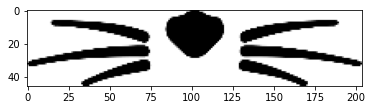

In [297]:

x = list_points[30][0] # 코에 x 좌표(왕관 x)
y = list_points[30][1]


w = (list_points[30][0] - list_points[2][0]) *2 
h =  int(img_origin_mushtache.shape[0]* (w/img_origin_mushtache.shape[1]))           #(list_points[48][1] - list_points[36][1])

print(w, h)

print("원래크기: ",img_origin_mushtache.shape)

plt.imshow(img_origin_mushtache)
plt.show()


img_resize_mushtache = cv2.resize(img_origin_mushtache, (w,h))
print("resize: ",img_resize_mushtache.shape)
img_mushtache_rgb = cv2.cvtColor(img_resize_mushtache, cv2.COLOR_BGR2RGB)
plt.imshow(img_mushtache_rgb)
plt.show()


In [298]:
# 스티커 위치. 조정 시작점.
# plt.scatter(list_points[48][0],list_points[33][1], s=20)
refined_x = x - w // 2  # left
refined_y = y        # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (204,316)


## 스티커 붙이기

In [299]:
img_resize_mushtache.shape

(46, 204, 3)

In [300]:

print("img_resize_mushtache.shape: ", img_mushtache_rgb.shape)
print("refined_y: ", refined_y)
print("img_resize_mushtache.shape[0]: ", img_mushtache_rgb.shape[0])
print("refined_x: ", refined_x)
print("img_resize_mushtache.shape[1]: ", img_mushtache_rgb.shape[1])
print("\n")

print(img_show.shape)
print(refined_y,img_mushtache_rgb.shape[0], refined_x,refined_x+img_mushtache_rgb.shape[1])
mushtache_area = img_show[refined_y:refined_y+img_mushtache_rgb.shape[0], refined_x:refined_x+img_mushtache_rgb.shape[1]]

#print("mushtache_area", mushtache_area)


img_resize_mushtache.shape:  (46, 204, 3)
refined_y:  316
img_resize_mushtache.shape[0]:  46
refined_x:  204
img_resize_mushtache.shape[1]:  204


(747, 600, 3)
316 46 204 408


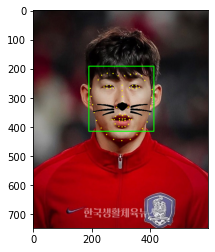

In [301]:
img_show[refined_y:refined_y+img_mushtache_rgb.shape[0], 
         refined_x:refined_x+img_mushtache_rgb.shape[1]] = \
            np.where(img_mushtache_rgb==255,mushtache_area,img_mushtache_rgb).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)) 
plt.show()

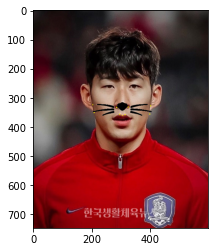

In [302]:

img_origin_target[refined_y:refined_y+img_resize_mushtache.shape[0], refined_x:refined_x+img_resize_mushtache.shape[1]] = \
    np.where(img_mushtache_rgb ,mushtache_area,img_resize_mushtache).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_origin_target, cv2.COLOR_BGR2RGB)) 
plt.show()

## 문제 찾기
- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
- 실행 속도가 중요할까요?
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

In [303]:
## 콧수염 리사이즈
# 입슬과 코사이 33, 51 유클리드 거리로  => hight 
# 입술 48, 54 width 유클리드 거리로=> width

# def euclidean_distance(pt1, pt2):
#   distance = 0
#   for i in range(len(pt1)):
#     distance += (pt1[i] - pt2[i]) ** 2
#   return distance ** 0.5

# h = int(euclidean_distance(list_points[33], list_points[51])) 
# w = int(euclidean_distance(list_points[48], list_points[54])) 
#####################################################################################
#  2, 30   36, 48,

In [304]:
#각 도 계산해서 회전하기.

### face_detection fn

In [308]:
#

def face_detection(target , target_show):
    
    # detector 선언
    Detector_HOG = dlib.get_frontal_face_detector()

    img_rgb2 = cv2.cvtColor(target, cv2.COLOR_BGR2RGB) # rgb 이미지 

    face_rect2 = Detector_HOG(img_rgb2, 1) # 이미지 파라미터

    for dlib_rect in face_rect2:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

    cv2.rectangle(target_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb2 =  cv2.cvtColor(target_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb2)
    plt.show()
    return face_rect2

###  face landmark localization fn


In [313]:
#
def landmark_localization(face_rect2, img_origin_target2, img_show2):
    
    model_path = './data/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    img_rgb2 = cv2.cvtColor(img_origin_target2, cv2.COLOR_BGR2RGB)

    points = landmark_predictor(img_rgb2, face_rect2[0])
    print("points", points)
    
    # 포인트 색출
    list_point = []
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # x,y 좌표 셋트로
    list_point.append(list_points)

    print("\n-포인트 좌표들-")
    print(list_point)
    print("\n")
    print(len(list_point[0]))
    
    
    for idx, point in enumerate(list_points):
        cv2.circle(img_show2, point, 2, (0, 255, 255), -1) # yellow

    img_show_rgb = cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()

### 스티커 붙이는 함수

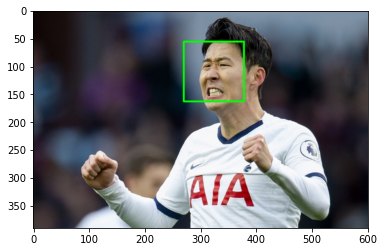

points <_dlib_pybind11.full_object_detection object at 0x7f398871fab0>

-포인트 좌표들-
[[(300, 108), (297, 117), (296, 128), (297, 139), (300, 150), (304, 160), (308, 169), (314, 177), (323, 179), (336, 178), (349, 173), (363, 167), (376, 158), (384, 146), (388, 133), (390, 118), (391, 104), (304, 93), (307, 89), (311, 87), (317, 87), (321, 90), (327, 89), (335, 85), (344, 83), (353, 86), (359, 92), (322, 99), (320, 105), (317, 111), (315, 116), (312, 125), (315, 127), (319, 128), (324, 127), (330, 125), (308, 103), (311, 100), (315, 100), (318, 102), (315, 103), (311, 103), (336, 100), (340, 97), (345, 98), (349, 100), (345, 100), (341, 101), (312, 150), (311, 141), (315, 137), (319, 138), (325, 137), (334, 140), (343, 148), (335, 155), (327, 157), (321, 158), (316, 158), (313, 156), (314, 149), (316, 140), (320, 140), (325, 140), (340, 148), (326, 153), (321, 154), (316, 154)]]


68


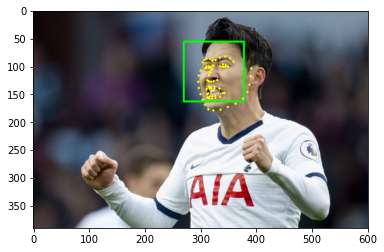

In [312]:
#img path
img_path2= "./imgs/s2.png"

#img read
img_origin_target2 = cv2.imread(img_path2)

img_show2 = img_origin_target2.copy() # 출력용 이미지 복사

face_rect2 = face_detection(img_origin_target2, img_show2)

landmark_localization(face_rect2, img_origin_target2, img_show2)

# Comment

![](./imgs/s4.png)

- 사람의 삐뚤어지지 않은 정면 사진에 스티커를 붙이는 거는 사이즈를 조정하거나 위치를 잡는데 큰 변수가 없었다.
- 똑같은 사람이라도 얼굴 표정, 사진 각도, 기울어짐 등에 따라 얼굴을 인식하는 형태가 달라졌다.
- 얼굴 dectection과 얼굴랜드마크 포인트들이 제각기 달라진다. 그래서 첨가해서 붙이려는 콘텐츠(고양이 수염) 같은 경우에도 정면일 경우를 큰 문제가 없었지만, 각도만 좀 달라져도 원래 넣었던 이미지 크기 비율, 위치 각도가 다 부적절해졌다.

![](./imgs/s2_m.png)

- 수염 이미지를 일러스트레이터로 수동으로 조정해 본 결과 수염이 원래 배치될 정면 사진과 비교해서 달라진 얼굴의 영역을 고려해서 수염의 크기를 조절해야 되고 비틀어진 얼굴만큼 수염을 rotate해야 했다.
- 좀 더 정확하게 스티커앱을 완성시키려면 얼굴에 전체적인 각도를 연산하고, 수염이 원래 배치될 영역의 비율들을 계산한 뒤 수염 이미지의 비율대로 쪼개서 다시 적용하고 스티커를 붙여야 좀 더 나은 앱이 될 수 있을 것 같다.
-
